# Plotting

This notebook is used for plotting results after they've been comp.

In [28]:
from modules import *

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
# What data to load
load_seaice   = True
load_indicies = True
load_ERA5     = False

# What indicies and variables
indicies  = ['SAM','IPO', 'DMI', 'ENSO']
variables = ['t2m']

# Resolutions to save data as.
resolutions = [1]
n = 5

# temporal averages
temporal_resolution = ['monthly', 'seasonal', 'annual']
temporal_resolution = ['annual']

# temporal_breakdown
temporal_decomposition = ['raw', 'anomalous']

# detrending
detrend = ['raw', 'detrended']
detrend = ['raw']

seaice_source = 'nsidc'

minyear = 1979
maxyear = 2000

## Different Indicies and correlations

Our first task is to consider the different indicies we are interested in. These are as follows:

    1) IPO 
    2) Nino 3.4
    3) Nino 1+2
    4) DMI
    5) SAM
    6) MEI
    6) SOI
    7) SAM
    8) ... maybe more when downloading?
    
In considering these we want to find the correlations between them and plot them together to consider similarities and differences.

Let's start by loading them to memory and plotting the timeseries in different plots.

In [30]:
ds = p2.load_indicies()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 72.34it/s]


1.91e-19 2.3991896404346793
6.23e-19 4.92
-5.14e-19 2.031
5.42e-19 4.8
-7.01e-20 29.23
6.56e-20 29.42
-4.68e-19 2.89


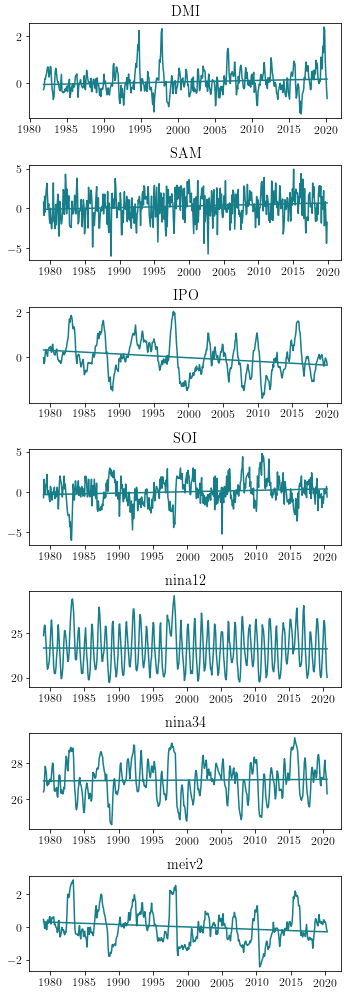

In [31]:
p2.plot_indicies(ds)

Now we know what the indicies look like we want to consider how similar they are. We can do this with a simple correlation table.

In [32]:
correlations, pvalues = p2.find_correlations(ds)

49it [00:00, 297.76it/s]


In [33]:
correlations.to_latex('images/week0/correlations.tex')
correlations

,DMI,SAM,IPO,SOI,nina12,nina34,meiv2
DMI,1,-0.119456,0.227409,-0.201981,0.0504258,0.284523,0.214418
SAM,-0.119456,1,-0.0763978,0.0934893,0.0447627,-0.0531056,-0.0825078
IPO,0.227409,-0.0763978,1,-0.730663,0.340962,0.80227,0.903615
SOI,-0.201981,0.0934893,-0.730663,1,-0.200189,-0.629432,-0.777864
nina12,0.0504258,0.0447627,0.340962,-0.200189,1,0.426639,0.333465
nina34,0.284523,-0.0531056,0.80227,-0.629432,0.426639,1,0.776871
meiv2,0.214418,-0.0825078,0.903615,-0.777864,0.333465,0.776871,1


In [34]:
pvalues.to_latex('images/week0/pvalues.tex')
pvalues

,DMI,SAM,IPO,SOI,nina12,nina34,meiv2
DMI,0,0.0105081,8.27226e-07,1.24214e-05,0.279949,4.92666e-10,3.39444e-06
SAM,0.0105081,0,0.0905032,0.0381761,0.321756,0.239686,0.0674632
IPO,8.27226e-07,0.0905032,0,1.39453e-83,6.50101e-15,2.60849e-112,2.77017e-183
SOI,1.24214e-05,0.0381761,1.39453e-83,0,6.73709e-06,2.61735e-56,6.32348e-102
nina12,0.279949,0.321756,6.50101e-15,6.73709e-06,0,1.55614e-23,2.25837e-14
nina34,4.92666e-10,0.239686,2.60849e-112,2.61735e-56,1.55614e-23,0,1.66401e-101
meiv2,3.39444e-06,0.0674632,2.77017e-183,6.32348e-102,2.25837e-14,1.66401e-101,0


## IPO MEI DMI SAM

Now we have considered the different indicies let's do some regressions. Let's start with a multivariate model that uses IPO, MEI, DMI and SAM to predict the concentration for seaice in Antarctica.

For this we want the following plots.

    1) Spatial Distribution of coefficients.
    2) Contribution to Seaice Trends. (Spatial distribution)
        - Calculated by calculating expected SIC and taking a trend.
    3) Contribution to variability
        - Scatter plots.
        - Time series graphs.
        
### Running the model

raw_annual_1_raw
anomalous_annual_1_raw


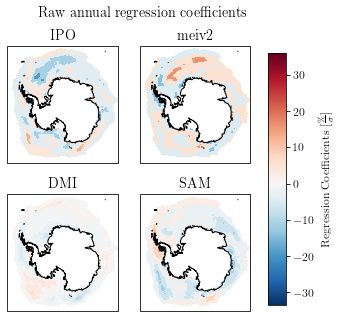

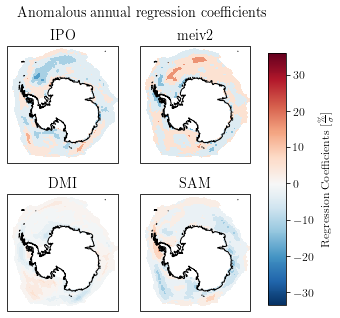

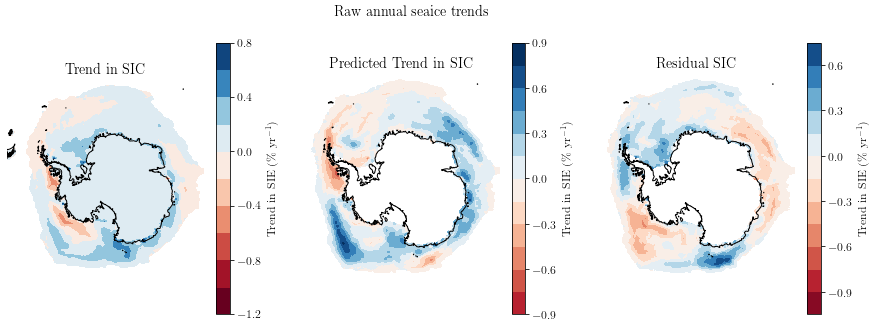

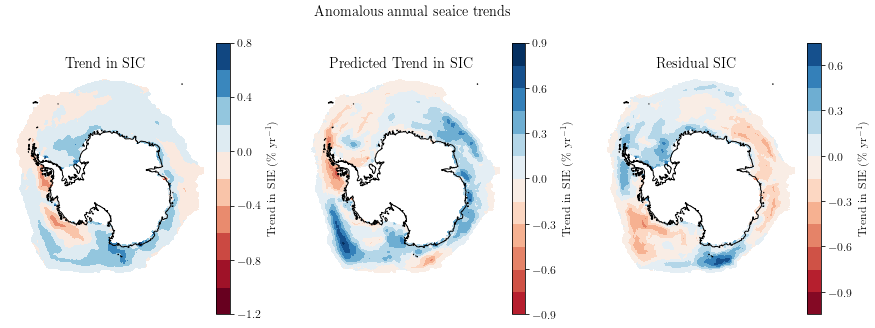

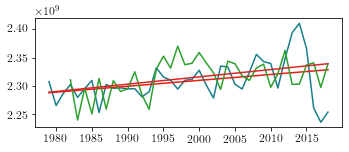

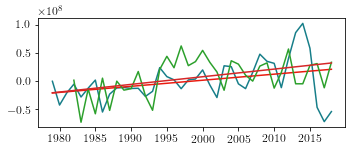

In [36]:
subindicies = ['IPO', 'meiv2', 'DMI', 'SAM']
p2.main(subindicies, resolutions, temporal_resolution,temporal_decomposition,detrend)

In [23]:
sic = p2.load_seaice(resolutions, temporal_resolution, temporal_decomposition, detrend)
ds = p2.load_indicies()
normalized = p2.normalise_indicies(ds)[subindicies]

sic

[autoreload of modules.plotting2 failed: Traceback (most recent call last):
  File "C:\Users\Hamish\Anaconda3\envs\Antarctica\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\Hamish\Anaconda3\envs\Antarctica\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\Hamish\Anaconda3\envs\Antarctica\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\Hamish\Anaconda3\envs\Antarctica\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_fram

<xarray.Dataset>
Dimensions:                   (time: 160, x: 316, y: 332)
Coordinates:
  * time                      (time) datetime64[ns] 1978-12-01 ... 2018-09-01
  * x                         (x) int32 -3950000 -3925000 ... 3900000 3925000
  * y                         (y) int32 4350000 4325000 ... -3900000 -3925000
Data variables:
    raw_seasonal_1_raw        (time, y, x) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    anomalous_seasonal_1_raw  (time, y, x) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    raw_annual_1_raw          (time, y, x) float64 nan nan nan ... nan nan nan
    anomalous_annual_1_raw    (time, y, x) float64 nan nan nan ... nan nan nan

In [24]:
regression_results = p2.multiple_fast_regression(sic, normalized)

raw_seasonal_1_raw
anomalous_seasonal_1_raw


In [ ]:
regression_results

### Distribution of coefficients

In [ ]:
p2.plot_coefficients(regression_results)

### Contribution to Seaice trends

In [ ]:
prediction = sic.copy() * 0
for mode in regression_results.keys():
    for index in subindicies:
        prediction[mode] = prediction[mode] + regression_results[mode][index]*ds[index]
    prediction[mode] = prediction[mode] + regression_results[mode]['error']
prediction

In [ ]:
p2.contribution_to_trends(sic, prediction)

### Contribution to variability - Timeseries

In [ ]:
p2.plot_contribution_timeseries(sic,prediction, ds, regression_results)

### Contribution to variability - Scatter plot.

## IPO SOI+NINO DMI SAM

Now we have considered the different indicies let's do some regressions. Let's start with a multivariate model that uses IPO SOI+NINO DMI SAM to predict the concentration for seaice in Antarctica.

For this we want the following plots.

    1) Spatial Distribution of coefficients.
    2) Contribution to Seaice Trends. (Spatial distribution)
        - Calculated by calculating expected SIC and taking a trend.
    3) Contribution to variability
        - Scatter plots.
        - Time series graphs.
        
### Running the model

In [15]:
subindicies = ['IPO', 'SOI', 'DMI', 'SAM', 'nina34','nina12']

sic = p2.load_seaice(resolutions, temporal_resolution, temporal_decomposition, detrend)
ds = p2.load_indicies()
normalized = p2.normalise_indicies(ds)[subindicies]

In [16]:
regression_results = p2.multiple_fast_regression(sic, normalized)

raw_seasonal_1_raw
anomalous_seasonal_1_raw


In [17]:
regression_results

{'raw_seasonal_1_raw': <xarray.Dataset>
 Dimensions:  (x: 316, y: 332)
 Coordinates:
   * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000
   * x        (x) int32 -3950000 -3925000 -3900000 ... 3875000 3900000 3925000
 Data variables:
     IPO      (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
     SOI      (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
     DMI      (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
     SAM      (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
     nina34   (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
     nina12   (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
     error    (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0,
 'anomalous_seasonal_1_raw': <xarray.Dataset>
 Dimensions:  (x: 316, y: 332)
 Coordinates:
   * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000
  

### Distribution of coefficients

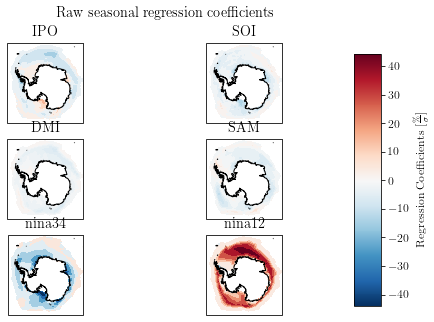

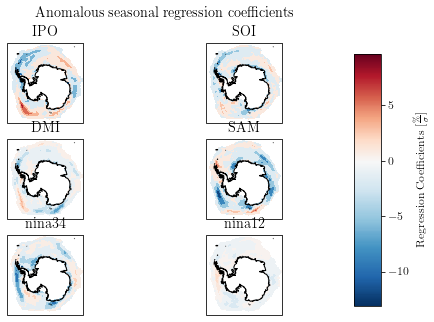

In [18]:
p2.plot_coefficients(regression_results)

### Contribution to Seaice trends

In [19]:
prediction = sic.copy() * 0
for mode in regression_results.keys():
    for index in subindicies:
        prediction[mode] = prediction[mode] + regression_results[mode][index]*ds[index]
    prediction[mode] = prediction[mode] + regression_results[mode]['error']
prediction

<xarray.Dataset>
Dimensions:                   (time: 160, x: 316, y: 332)
Coordinates:
  * time                      (time) datetime64[ns] 1978-12-01 ... 2018-09-01
  * x                         (x) int32 -3950000 -3925000 ... 3900000 3925000
  * y                         (y) int32 4350000 4325000 ... -3900000 -3925000
Data variables:
    raw_seasonal_1_raw        (time, y, x) float64 nan nan nan ... 0.0 0.0 0.0
    anomalous_seasonal_1_raw  (time, y, x) float64 nan nan nan ... 0.0 0.0 0.0
    raw_annual_1_raw          (time, y, x) float64 nan nan nan ... nan nan nan
    anomalous_annual_1_raw    (time, y, x) float64 nan nan nan ... nan nan nan

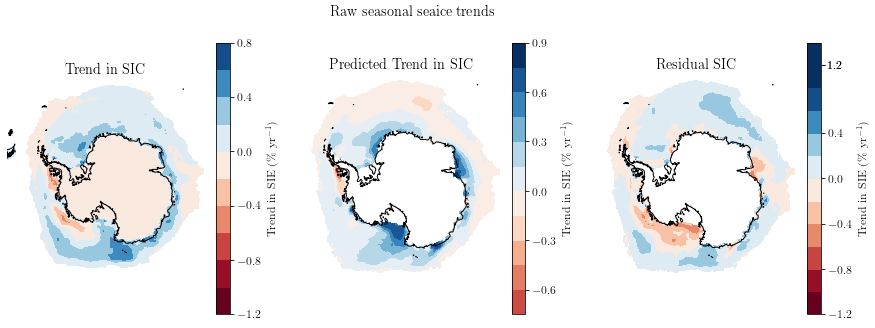

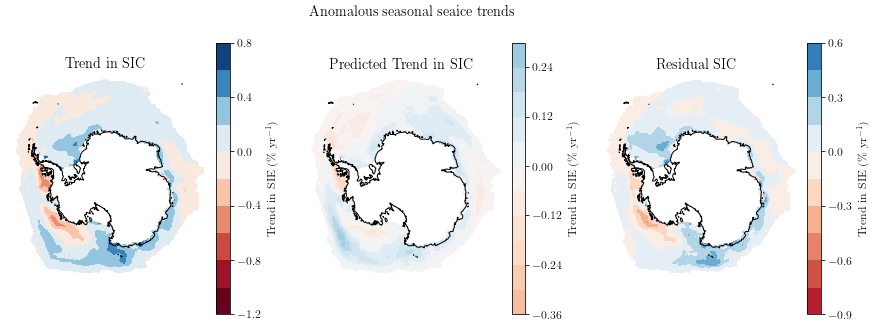

In [20]:
p2.contribution_to_trends(sic, prediction)

### Contribution to variability - Timeseries

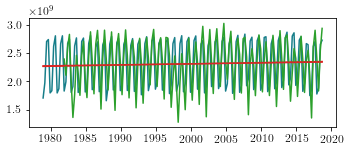

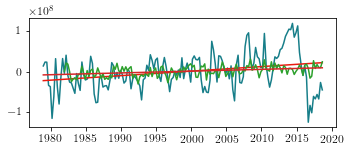

In [21]:
p2.plot_contribution_timeseries(sic,prediction, ds, regression_results)

### Contribution to variability - Scatter plot.

## Nino 1+2, 3.4

We also want to consider the different Nino indicies and see how they change the results.